# Resolution Study
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 1/31/2022|

In [1]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

## AB, Π=0.05
$\tau_\mathrm{s}=0.1$

$\epsilon=1.0$

### DDD

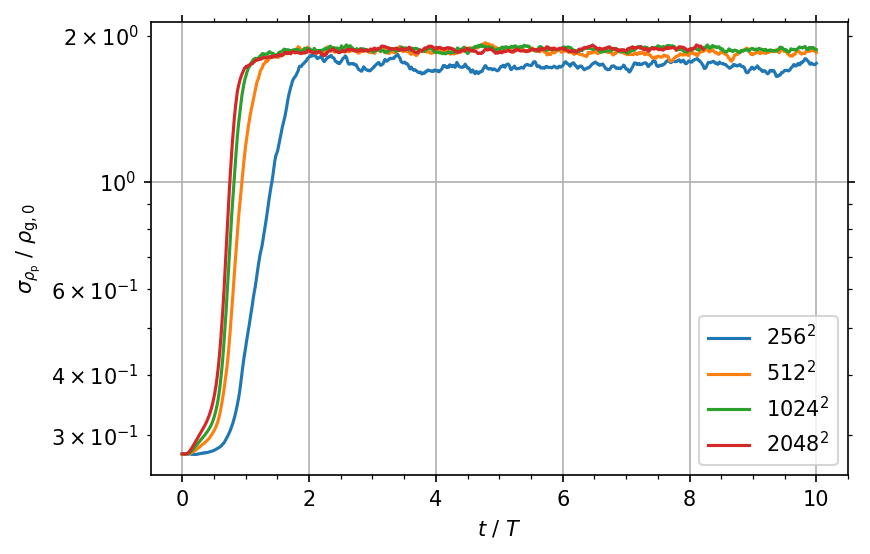

In [3]:
fig, ax = plt.subplots(dpi=150)
run = 'AB'
ress = ['256', '512', '1024', '2048']

for res in ress:
    hst = athena_read.hst('../nonlinear/Pi/%s/0.05/%s/output/SI.hst'%(run, res))
    times = hst['time']
    rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2)
    ax.semilogy(times, rhop_amps, label=res+r'$^2$')

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlabel=r'$t$ / $T$', ylabel=r'$\sigma_{\rho_\mathrm{p}}$ / $\rho_\mathrm{g,0}$')
ax.tick_params(axis='both', which='both', top=True, right=True)


### CPDD

AB/0.05/256 : 18.5% ρₚ = 0
AB/0.05/512 : 26.6% ρₚ = 0
AB/0.05/1024: 29.2% ρₚ = 0
AB/0.05/2048: 30.6% ρₚ = 0


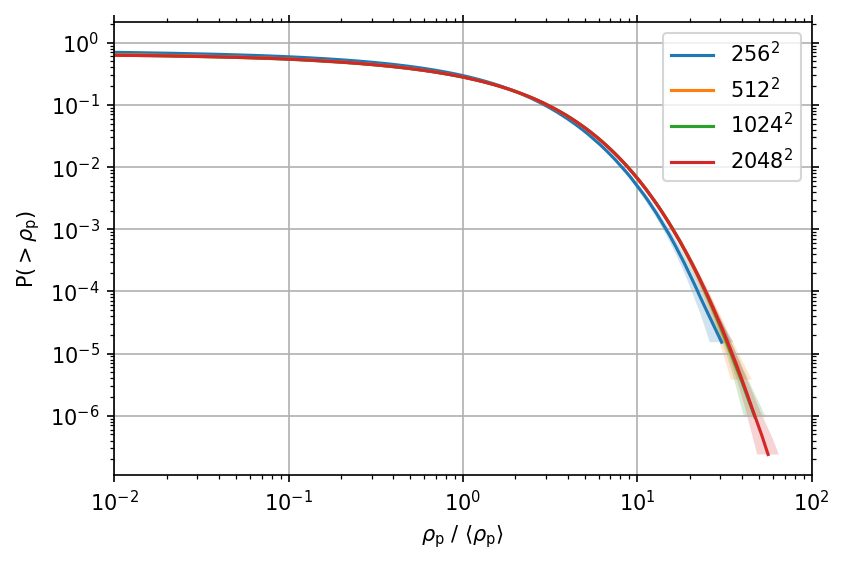

In [5]:
fig, ax = plt.subplots(dpi=150)
run = 'AB'
xlim = (1e-2, 1e2)
Pi = '0.05'
ress = ['256', '512', '1024', '2048']

for res in ress:
    data = np.load('../nonlinear/Pi/%s/%s/%s/output/cpdd.npz'%(run, Pi, res))
    nonzeros = np.count_nonzero(data['avgs'])
    size = data['avgs'].size
    zeros = size - nonzeros
    print('{}/{}/{:<4}: {:.1f}% ρₚ = 0'.format(run, Pi, res, 100*zeros/size))
    ax.loglog(data['avgs'], data['cdf'], label=res+r'$^2$')
    ax.fill_betweenx(data['cdf'], data['avgs']/data['stds'],
                     data['avgs']*data['stds'], alpha=0.2)

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlim=xlim, xlabel=r'$\rho_\mathrm{p}$ / $\langle \rho_\mathrm{p} \rangle$',
       ylabel=r'P$(>\rho_\mathrm{p})$')
ax.tick_params(axis='both', which='both', top=True, right=True)


## ΒΑ, Π=0.05
$\tau_S=1.0$

$\epsilon=0.2$

### DDD

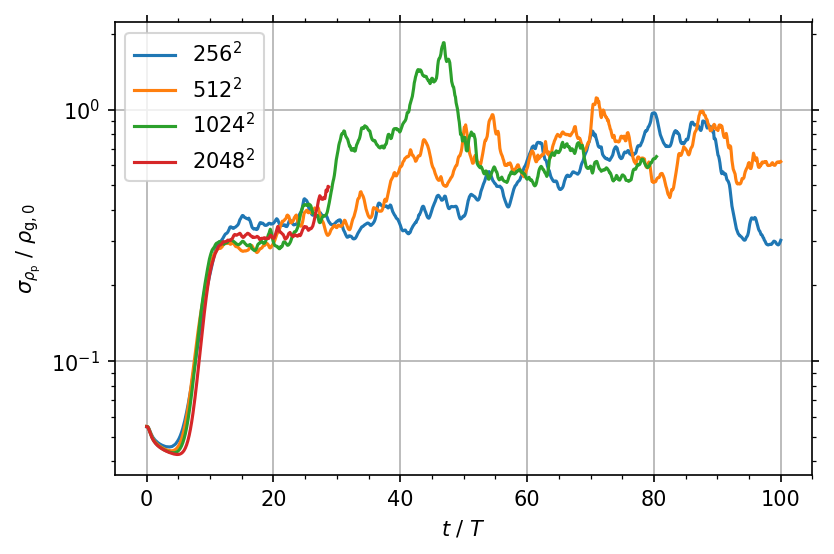

In [9]:
fig, ax = plt.subplots(dpi=150)
run = 'BA'
ress = ['256', '512', '1024', '2048']

for res in ress:
    hst = athena_read.hst('../nonlinear/Pi/%s/0.05/%s/output/SI.hst'%(run, res))
    times = hst['time']
    rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2)
    ax.semilogy(times, rhop_amps, label=res+r'$^2$')

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlabel=r'$t$ / $T$', ylabel=r'$\sigma_{\rho_\mathrm{p}}$ / $\rho_\mathrm{g,0}$')
ax.tick_params(axis='both', which='both', top=True, right=True)


### CPDD

BA/0.05/256 : 0.3% ρₚ = 0
BA/0.05/512 : 0.3% ρₚ = 0
BA/0.05/1024: 0.9% ρₚ = 0
BA/0.05/2048: 0.6% ρₚ = 0


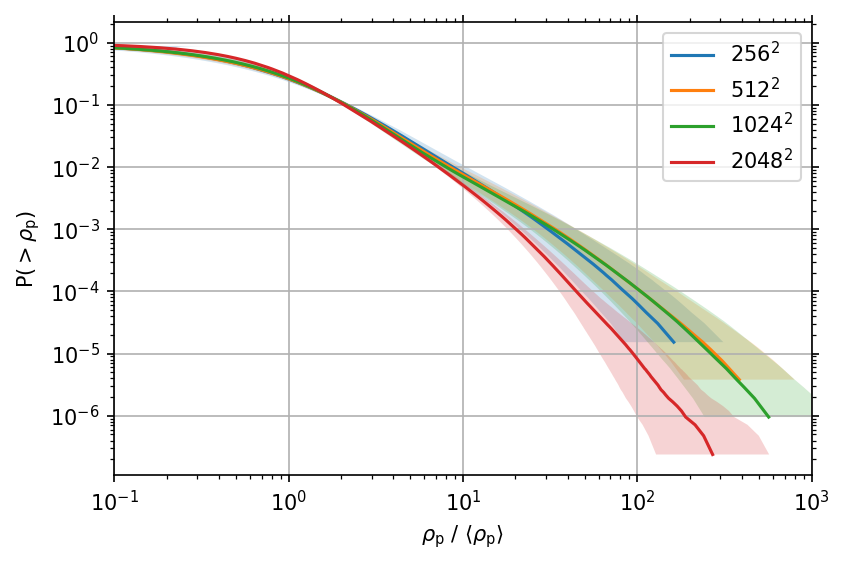

In [11]:
fig, ax = plt.subplots(dpi=150)
run = 'BA'
xlim = (1e-1, 1e3)
Pi = '0.05'
ress = ['256', '512', '1024', '2048']

for res in ress:
    data = np.load('../nonlinear/Pi/%s/%s/%s/output/cpdd.npz'%(run, Pi, res))
    nonzeros = np.count_nonzero(data['avgs'])
    size = data['avgs'].size
    zeros = size - nonzeros
    print('{}/{}/{:<4}: {:.1f}% ρₚ = 0'.format(run, Pi, res, 100*zeros/size))
    ax.loglog(data['avgs'], data['cdf'], label=res+r'$^2$')
    ax.fill_betweenx(data['cdf'], data['avgs']/data['stds'],
                     data['avgs']*data['stds'], alpha=0.2)

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlim=xlim, xlabel=r'$\rho_\mathrm{p}$ / $\langle \rho_\mathrm{p} \rangle$',
       ylabel=r'P$(>\rho_\mathrm{p})$')
ax.tick_params(axis='both', which='both', top=True, right=True)
